In [1]:
#2.1

In [2]:
import tensorflow_datasets as tfds
[test_set_raw, valid_set_raw, train_set_raw], info = tfds.load(
    "tf_flowers",
split=["train[:10%]", "train[10%:25%]", "train[25%:]"], as_supervised=True,
with_info=True)

C:\Users\Daniel\.conda\envs\ml\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...:   0%|                                                                         | 0/1 [00:12<?, ? url/s]


Dl Completed...:   0%|                                                                         | 0/1 [00:28<?, ? url/s]


Dl Completed...:   0%|                                                                         | 0/1 [00:49<?, ? url/s]


Dl Completed...:   0%|                                                                         | 0/1 [01:08<?, ? url/s]


Dl Completed...:   0%|                                                                         | 0/1 [01:23<?, ? url/s]


Dl Completed...:   0%|                                                                         | 0/1 [01:33<?, ? url/s]


Generating splits...:   0%|                                                                 | 0/1 [00:00<?, ? splits/s]
Generating train examples...: 0 examples [00:00, ? examples/s]
Generating train examples...: 93 examples [00:00, 920.83 examples/s]
Generating train examples...: 203 examples [00:00, 1025.79 examples/s]
Generating train examples...: 324 examples [00:00, 1109.70 examples/s]
Generating train examples...: 458 examples [00:00, 1200.49 examples/s]
Generating train examples...: 579 examples [00:00, 1186.83 examples/s]
Generating train examples...: 698 examples [00:00, 1134.29 examples/s]
Generating train examples...: 826 examples [00:00, 1176.58 examples/s]
Generating train examples...: 945 examples [00:00, 1159.10 examples/s]
Generating train examples...: 1062 examples [00:00, 1148.50 examples/s]
Generating train examples...: 1178 examples [00:01, 1145.07 examples/s]
Generating train examples...: 1300 examples [00:01, 1164.06 examples/s]
Generating train examples...: 1420 

Shuffling ~\tensorflow_datasets\tf_flowers\3.0.1.incomplete74CCGU\tf_flowers-train.tfrecord*...:  63%|▋| 2329/3670 [00:
Shuffling ~\tensorflow_datasets\tf_flowers\3.0.1.incomplete74CCGU\tf_flowers-train.tfrecord*...:  84%|▊| 3087/3670 [00:


Dataset tf_flowers downloaded and prepared to ~\tensorflow_datasets\tf_flowers\3.0.1. Subsequent calls will reuse this data.


In [3]:
info

tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_path='~\\tensorflow_datasets\\tf_flowers\\3.0.1',
    file_format=tfrecord,
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)

In [4]:
class_names = info.features["label"].names
n_classes = info.features["label"].num_classes
dataset_size = info.splits["train"].num_examples

In [5]:
class_names

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

In [6]:
n_classes

5

In [7]:
dataset_size

3670

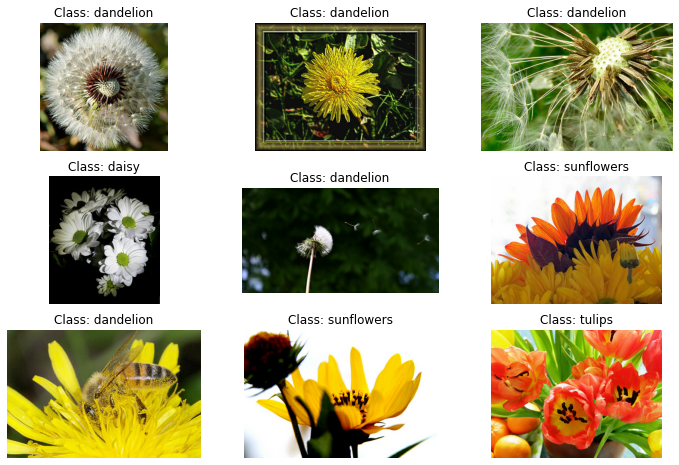

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
index = 0
sample_images = train_set_raw.take(9) 
for image, label in sample_images:
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image)
    plt.title("Class: {}".format(class_names[label])) 
    plt.axis("off")
plt.show(block=False)

In [9]:
#2.2.1

In [10]:
def preprocess(image, label):
    resized_image = tf.image.resize(image, [224, 224]) 
    return resized_image, label

In [11]:
import tensorflow as tf
batch_size = 32
train_set = train_set_raw.map(preprocess).shuffle(dataset_size).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1) 
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

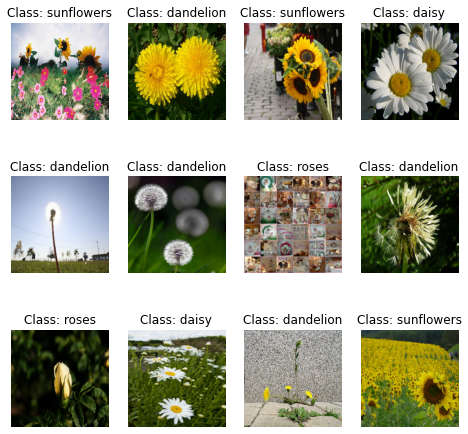

In [12]:
plt.figure(figsize=(8, 8)) 
sample_batch = train_set.take(1)
for X_batch, y_batch in sample_batch:
    for index in range(12):
        plt.subplot(3, 4, index + 1) 
        plt.imshow(X_batch[index]/255.0)
        plt.title("Class: {}".format(class_names[y_batch[index]])) 
        plt.axis("off")
plt.show()

In [13]:
#2.2.2

In [14]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Rescaling(scale=1./127.5, offset=-1))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=7, input_shape=[224, 224, 1],padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=5))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(25,activation="relu"))
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [15]:
opt = tf.keras.optimizers.get("sgd")
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

In [16]:
history = model.fit(train_set, epochs=10, validation_data=valid_set)

Epoch 1/10
86/86 [==============================] - 30s 130ms/step - loss: 1.6498 - accuracy: 0.2863 - val_loss: 1.2883 - val_accuracy: 0.4338
Epoch 2/10
86/86 [==============================] - 17s 111ms/step - loss: 1.2576 - accuracy: 0.4677 - val_loss: 1.2235 - val_accuracy: 0.4773
Epoch 3/10
86/86 [==============================] - 10s 104ms/step - loss: 1.1424 - accuracy: 0.5302 - val_loss: 1.1863 - val_accuracy: 0.5009
Epoch 4/10
86/86 [==============================] - 19s 201ms/step - loss: 1.0635 - accuracy: 0.5676 - val_loss: 1.1157 - val_accuracy: 0.5572
Epoch 5/10
86/86 [==============================] - 14s 148ms/step - loss: 0.9797 - accuracy: 0.6086 - val_loss: 1.0893 - val_accuracy: 0.5590
Epoch 6/10
86/86 [==============================] - 18s 180ms/step - loss: 0.9161 - accuracy: 0.6457 - val_loss: 1.0823 - val_accuracy: 0.5372
Epoch 7/10
86/86 [==============================] - 18s 178ms/step - loss: 0.8741 - accuracy: 0.6588 - val_loss: 1.0516 - val_accuracy: 0.5644

In [25]:
acc_train = model.evaluate(train_set)[1]
acc_test = model.evaluate(test_set)[1]
acc_validate = model.evaluate(valid_set)[1]
simple_cnn_acc = (acc_train, acc_test , acc_validate)

18/18 [==============================] - 1s 36ms/step - loss: 1.1497 - accuracy: 0.5644


In [27]:
import pickle as pkl
fileObject = open("simple_cnn_acc.pkl",'wb')
pkl.dump(simple_cnn_acc, fileObject)
fileObject.close()
model.summary()

NameError: name 'pkl' is not defined